# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#display(mouse_metadata, study_results)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "right")


# Display the data table for preview
display(mouse_study.head())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
print(f"There are {mice_count} unique mouse IDs in the data.")

There are 249 unique mouse IDs in the data.


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
display(duplicate_mice)

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study.loc[mouse_study["Mouse ID"].isin(duplicate_mice)]
display(duplicate_mice_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.loc[~mouse_study["Mouse ID"].isin(duplicate_mice)]
display(clean_mouse_study.head()) 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_study["Mouse ID"].nunique()
display(clean_mice_count)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

study_mean = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
study_median = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
study_var = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
study_std = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
study_sem =clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

study_summary = pd.DataFrame({
    "Mean Tumor Volume" : study_mean,
    "Median Tumor Volume" : study_median,
    "Tumor Volume Variance" : study_var,
    "Tumor Volume Std. Dev." : study_std,
    "Tumor Volume Std. Err." : study_sem
})
display(study_summary)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

study_statistics = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = "mean", 
    median = "median", 
    variance = "var", 
    std_dev = "std",
    std_err = "sem"
).rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "variance": "Tumor Volume Variance",
    "std_dev": "Tumor Volume Std. Dev.",
    "std_err": "Tumor Volume Std. Err."
})
display(study_statistics)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

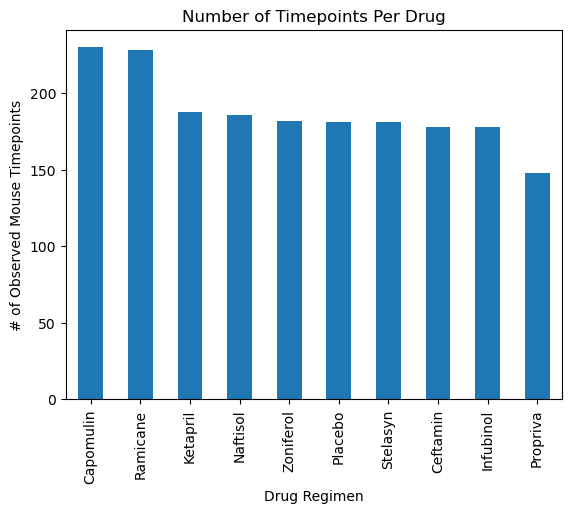

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_mouse_study.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

regimen_counts.plot(kind = "bar")
plt.title("Number of Timepoints Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

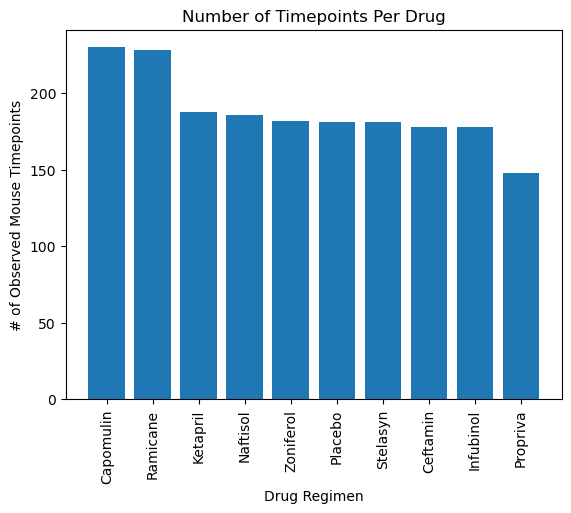

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(6.4, 4.8))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Number of Timepoints Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Mice Sex Distribution')

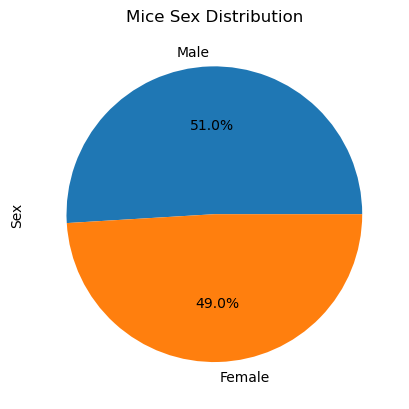

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mouse_study.groupby("Sex")["Sex"].count().sort_values(ascending=False)
sex_counts.plot(kind = "pie", autopct="%1.1f%%")
plt.title("Mice Sex Distribution")

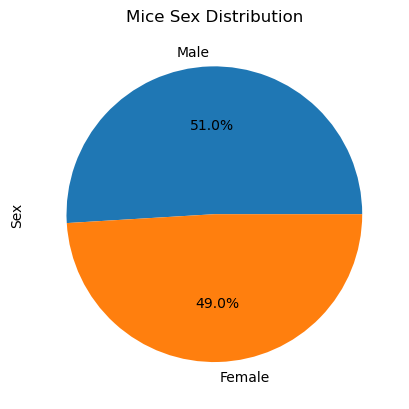

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(6.4, 4.8))
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Mice Sex Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(clean_mouse_study, last_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_last_tumor_vol = last_tumor_vol[last_tumor_vol["Drug Regimen"].isin(drug_regimens)]
display(filtered_last_tumor_vol)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,27,45,68.594745,4
239,y793,Capomulin,Male,17,17,45,31.896238,2
240,y865,Ceftamin,Male,23,26,45,64.729837,3
244,z578,Ramicane,Male,11,16,45,30.638696,0


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in drug_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = filtered_last_tumor_vol[filtered_last_tumor_vol["Drug Regimen"] == drug]
    tumor_volumes = drug_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
        


        
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"Drug: {drug}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")




    

Drug: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Drug: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



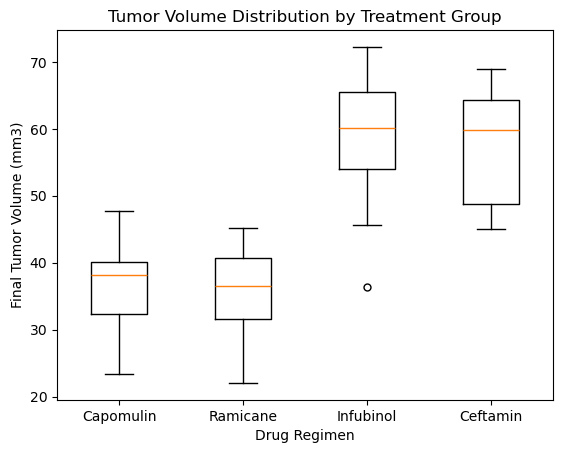

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6.4, 4.8))
plt.boxplot(tumor_vol_data, labels=drug_regimens, flierprops=dict(marker="o", color="red", markersize=5))

# Customize the plot
plt.title("Tumor Volume Distribution by Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Display the plot
plt.show()

## Line and Scatter Plots

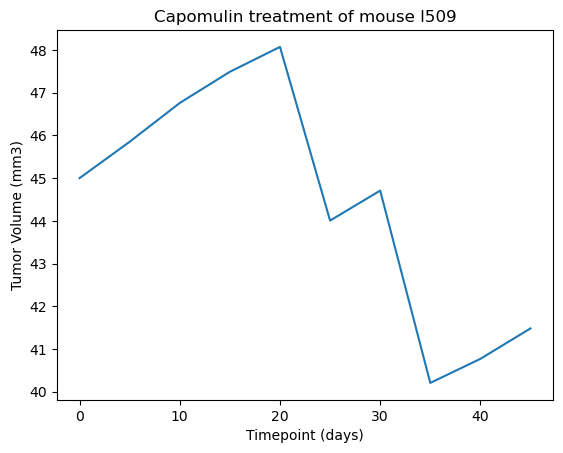

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Input the "Mouse_ID" with the actual mouse ID you"re interested in
mouse_id = "l509"

# Filter for Capomulin and the specific mouse
capomulin_mouse_df = clean_mouse_study[(clean_mouse_study["Drug Regimen"] == "Capomulin") & (clean_mouse_study["Mouse ID"] == mouse_id)]

# Plotting
plt.figure(figsize=(6.4, 4.8))
plt.plot(capomulin_mouse_df["Timepoint"], capomulin_mouse_df["Tumor Volume (mm3)"])

# Customize the plot
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

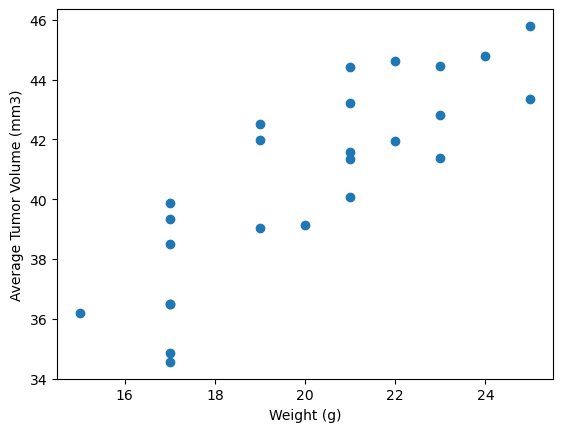

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
capomulin_df = clean_mouse_study[clean_mouse_study["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate average tumor volume
grouped_capomulin = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Scatter plot
plt.figure(figsize=(6.4, 4.8))
plt.scatter(grouped_capomulin["Weight (g)"], grouped_capomulin["Tumor Volume (mm3)"])

# Customize the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


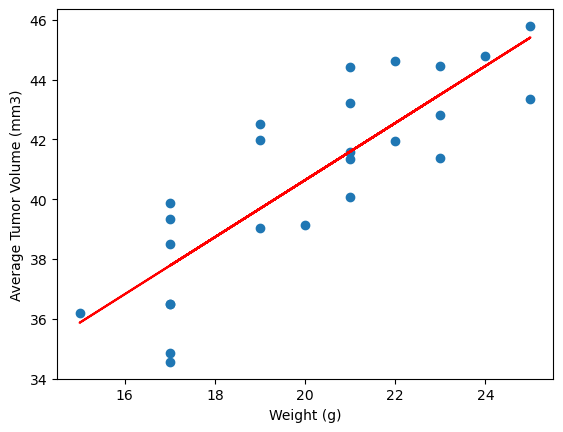

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = grouped_capomulin["Weight (g)"]
y = grouped_capomulin["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Plot the regression line
plt.figure(figsize=(6.4, 4.8))
plt.scatter(x, y)
plt.plot(x, regression_line(x), color="red")

# Customize the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()